Assignment 2

Author: Hanya Zamir 900212533

Abstract: These series of codes aim to analyze two datasets. The first illustrates the number of wins and losses for different countries in different types of matches in relation to both their home country and far away, which shows the importance of different variables to a team's performance. The second provides the numbers of covid cases in 202 and 2022 in different countries.

In [2]:
import pandas as pd

In [110]:
df=pd.read_csv("results.csv")

In [111]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [112]:
values= ['win','lose','draw']

In [113]:
import numpy as np
df['result'] = np.select(conditions, values)

In [114]:
x=df['result'].value_counts()

In [115]:
df['country'].unique()

Assignment Part I

In [113]:
dfire=df[df['country']=='Ireland']

In [114]:
conditions = [
    (dfire['tournament']=='Friendly'),
    (dfire['tournament']!='Friendly')
    ]
values=['Friendly','Official']
dfire['typematch'] = np.select(conditions, values)

<ipython-input-114-99571b7b4e2f>:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfire['typematch'] = np.select(conditions, values)


In [115]:
dfire['typematch'].value_counts()

In [118]:
x=pd.crosstab(dfire['typematch'],dfire['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,1,0,1,2
Official,10,7,34,51
All,11,7,35,53


In [119]:
x=np.array(x)
x

In [120]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_irewin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_irewin_friendly

(0.0, 1.0)

In [121]:
CI_irewin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_irewin_official

(0.5372897650923262, 0.7960435682410071)

In [122]:
ci_irewin = {}
ci_irewin['Typematch'] = ['Friendly','Official']
ci_irewin['lb'] = [CI_irewin_friendly[0],CI_irewin_official[0]]
ci_irewin['ub'] = [CI_irewin_friendly[1],CI_irewin_official[1]]
df_ci= pd.DataFrame(ci_irewin)
df_ci

,Typematch,lb,ub
0,Friendly,0.00000,1.000000
1,Official,0.53729,0.796044


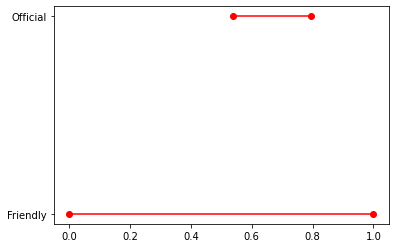

In [123]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Since the margin of error for the friendly matches was very high, we can conclude that Ireland were more succesful during their official matches

In [125]:
dfire['home']=(dfwal['home_team']=='Ireland')
dfire['home'].value_counts()

<ipython-input-125-8478ae796e89>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfire['home']=(dfwal['home_team']=='Ireland')


In [126]:
x=pd.crosstab(dfwal['home'],dfwal['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,0,14,6,20
True,84,123,112,319
All,84,137,118,339


In [127]:
x=np.array(x)

In [128]:
CI_irewin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_irewin_home

(0.29871829353558793, 0.40347606383118323)

In [129]:
CI_irewin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_irewin_away

(0.09916345547364067, 0.5008365445263593)

In [130]:
ci_irewin = {}
ci_irewin['home'] = ['Yes','No']
ci_irewin['lb'] = [CI_irewin_home[0],CI_irewin_away[0]]
ci_irewin['ub'] = [CI_irewin_home[1],CI_irewin_away[1]]
df_ci= pd.DataFrame(ci_irewin)
df_ci

,home,lb,ub
0,Yes,0.298718,0.403476
1,No,0.099163,0.500837


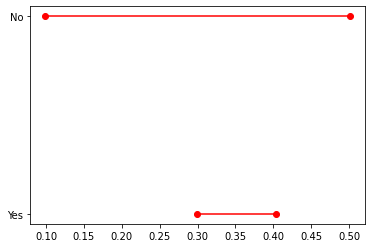

In [33]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Ireland were more likely to win when playing in their home country, meaning the crowd cheers affected their performance positively

In [180]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_irelose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_irelose_friendly

(0.4991634554736406, 0.9008365445263593)

In [179]:
CI_irelose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_irelose_official

(0.3321674678039326, 0.4389924068042179)

In [181]:
ci_irelose = {}
ci_irelose['Typematch'] = ['Friendly','Official']
ci_irelose['lb'] = [CI_irelose_friendly[0],CI_irelose_official[0]]
ci_irelose['ub'] = [CI_irelose_friendly[1],CI_irelose_official[1]]
df_ci= pd.DataFrame(ci_irelose)
df_ci

,Typematch,lb,ub
0,Friendly,0.499163,0.900837
1,Official,0.332167,0.438992


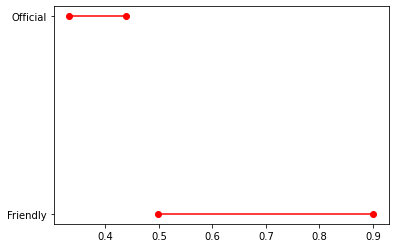

In [182]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Ireland are more likely to lose in friendly matches than official matches

In [183]:
x=np.array(x)
CI_irelose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_irelose_home


(0.3321674678039326, 0.4389924068042179)

In [184]:
CI_irelose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_irelose_away

(0.4991634554736406, 0.9008365445263593)

In [185]:
ci_irelose = {}
ci_irelose['home'] = ['Yes','No']
ci_irelose['lb'] = [CI_irelose_home[0],CI_irelose_away[0]]
ci_irelose['ub'] = [CI_irelose_home[1],CI_irelose_away[1]]
df_ci= pd.DataFrame(ci_irelose)
df_ci

,home,lb,ub
0,Yes,0.332167,0.438992
1,No,0.499163,0.900837


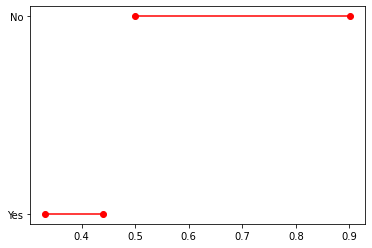

In [186]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Ireland are more likely to lose in far away matches, meaning that the lack of crowd cheers affects them negatively 

In [8]:
dfwal=df[df['country']=='Wales']

In [9]:
conditions = [
    (dfwal['tournament']=='Friendly'),
    (dfwal['tournament']!='Friendly')
    ]

In [10]:
values=['Friendly','Official']

In [11]:
import numpy as np
dfwal['typematch'] = np.select(conditions, values)

<ipython-input-11-0db6f9e305fa>:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfwal['typematch'] = np.select(conditions, values)


In [12]:
dfwal['typematch'].value_counts()

In [13]:
import pandas as pd
x=pd.crosstab(dfwal['typematch'],dfwal['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,21,26,24,71
Official,63,111,94,268
All,84,137,118,339


In [14]:
x=np.array(x)
x
                        

In [15]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_walwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_walwin_friendly

(0.2279971543780736, 0.4480591836500954)

In [16]:
CI_walwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_walwin_official



(0.29361360781866724, 0.4078789294947656)

In [18]:
ci_walwin = {}
ci_walwin['Typematch'] = ['Friendly','Official']
ci_walwin['lb'] = [CI_walwin_friendly[0],CI_walwin_official[0]]
ci_walwin['ub'] = [CI_walwin_friendly[1],CI_walwin_official[1]]
df_ci= pd.DataFrame(ci_walwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.227997,0.448059
1,Official,0.293614,0.407879


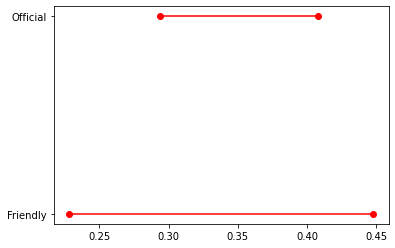

In [19]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Wales are more likely to win in official matches

In [20]:
dfwal['home']=(dfwal['home_team']=='Wales')

<ipython-input-20-cb7deabfae77>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfwal['home']=(dfwal['home_team']=='Wales')


In [21]:
dfwal['home']=(dfwal['home_team']=='Wales')

<ipython-input-21-cb7deabfae77>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfwal['home']=(dfwal['home_team']=='Wales')


In [22]:
x=pd.crosstab(dfwal['home'],dfwal['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,0,14,6,20
True,84,123,112,319
All,84,137,118,339


In [23]:
x=np.array(x)
CI_walwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_walwin_home

(0.29871829353558793, 0.40347606383118323)

In [30]:
CI_walwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_walwin_away

(0.09916345547364067, 0.5008365445263593)

In [31]:
ci_walwin = {}
ci_walwin['home'] = ['Yes','No']
ci_walwin['lb'] = [CI_walwin_home[0],CI_walwin_away[0]]
ci_walwin['ub'] = [CI_walwin_home[1],CI_walwin_away[1]]
df_ci= pd.DataFrame(ci_walwin)
df_ci

,home,lb,ub
0,Yes,0.298718,0.403476
1,No,0.099163,0.500837


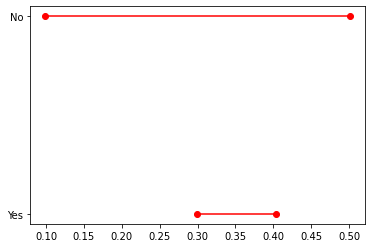

In [32]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Wales are more likely to win in their home country, meaning the crowd cheers affect thier performance positively

In [29]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_wallose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_wallose_friendly


(0.4991634554736406, 0.9008365445263593)

In [34]:
CI_wallose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_wallose_official

(0.3321674678039326, 0.4389924068042179)

In [35]:
ci_wallose = {}
ci_wallose['Typematch'] = ['Friendly','Official']
ci_wallose['lb'] = [CI_wallose_friendly[0],CI_wallose_official[0]]
ci_wallose['ub'] = [CI_wallose_friendly[1],CI_wallose_official[1]]
df_ci= pd.DataFrame(ci_wallose)
df_ci

,Typematch,lb,ub
0,Friendly,0.499163,0.900837
1,Official,0.332167,0.438992


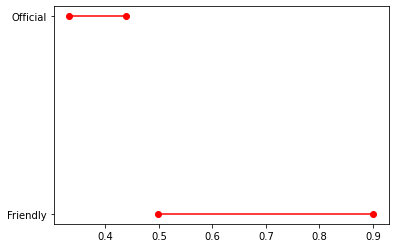

In [36]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Wales are more likely to lose in friendly matches than official matches


In [37]:
x=np.array(x)
CI_wallose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_wallose_home


(0.3321674678039326, 0.4389924068042179)

In [38]:
CI_wallose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_wallose_away

(0.4991634554736406, 0.9008365445263593)

In [39]:
ci_wallose = {}
ci_wallose['home'] = ['Yes','No']
ci_wallose['lb'] = [CI_wallose_home[0],CI_wallose_away[0]]
ci_wallose['ub'] = [CI_wallose_home[1],CI_wallose_away[1]]
df_ci= pd.DataFrame(ci_wallose)
df_ci

,home,lb,ub
0,Yes,0.332167,0.438992
1,No,0.499163,0.900837


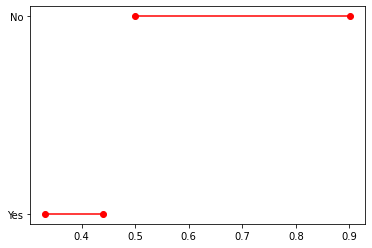

In [40]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Wales are more likely to lose in far away matches, meaning that the lack of crowd cheers affects them negatively 

In [41]:
dfscot=df[df['country']=='Scotland']

In [42]:
conditions = [
    (dfscot['tournament']=='Friendly'),
    (dfscot['tournament']!='Friendly')
    ]
values=['Friendly','Official']
dfscot['typematch'] = np.select(conditions, values)
dfscot['typematch'].value_counts()

<ipython-input-42-ba08f057aa84>:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfscot['typematch'] = np.select(conditions, values)


In [43]:
x=pd.crosstab(dfscot['typematch'],dfscot['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,19,54,34,107
Official,64,177,56,297
All,83,231,90,404


In [44]:
x=np.array(x)
CI_scotwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_friendly

(0.22953573779233233, 0.4059782808992564)

In [45]:
CI_scotwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_official

(0.1440669471299619, 0.2330374299744152)

In [46]:
ci_scotwin = {}
ci_scotwin['Typematch'] = ['Friendly','Official']
ci_scotwin['lb'] = [CI_scotwin_friendly[0],CI_scotwin_official[0]]
ci_scotwin['ub'] = [CI_scotwin_friendly[1],CI_scotwin_official[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.229536,0.405978
1,Official,0.144067,0.233037


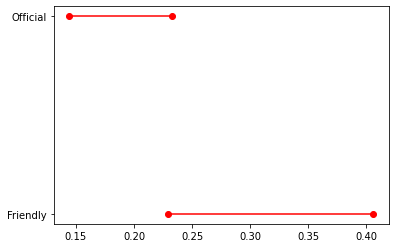

In [42]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Scotland are more likely to win friendly matches than in official matches

In [48]:
dfscot['home']=(dfscot['home_team']=='Scotland')

<ipython-input-48-28ef77a131ab>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfscot['home']=(dfscot['home_team']=='Scotland')


In [49]:
dfscot['home'].value_counts()

In [50]:
x=pd.crosstab(dfscot['home'],dfscot['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,6,14,8,28
True,77,217,82,376
All,83,231,90,404


In [51]:
x=np.array(x)
CI_scotwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_scotwin_home

(0.17634563783879345, 0.25982457492716404)

In [52]:
CI_scotwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_scotwin_away

(0.11838535517233528, 0.4530432162562361)

In [53]:
ci_scotwin = {}
ci_scotwin['home'] = ['Yes','No']
ci_scotwin['lb'] = [CI_scotwin_home[0],CI_scotwin_away[0]]
ci_scotwin['ub'] = [CI_scotwin_home[1],CI_scotwin_away[1]]
df_ci= pd.DataFrame(ci_scotwin)
df_ci

,home,lb,ub
0,Yes,0.176346,0.259825
1,No,0.118385,0.453043


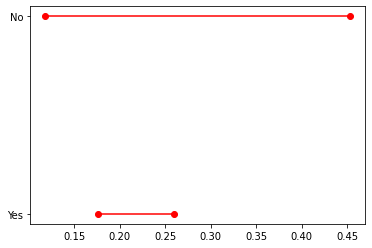

In [54]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Scotland are more likely to win in home matches, meaning that the lack of crowd cheers affects them negatively 

In [55]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_scotlose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_scotlose_friendly


(0.31480081136656335, 0.6851991886334367)

In [56]:
CI_scotlose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_scotlose_official

(0.5271938440225415, 0.6270614751263947)

In [57]:
ci_scotlose = {}
ci_scotlose['Typematch'] = ['Friendly','Official']
ci_scotlose['lb'] = [CI_scotlose_friendly[0],CI_scotlose_official[0]]
ci_scotlose['ub'] = [CI_scotlose_friendly[1],CI_scotlose_official[1]]
df_ci= pd.DataFrame(ci_scotlose)
df_ci

,Typematch,lb,ub
0,Friendly,0.314801,0.685199
1,Official,0.527194,0.627061


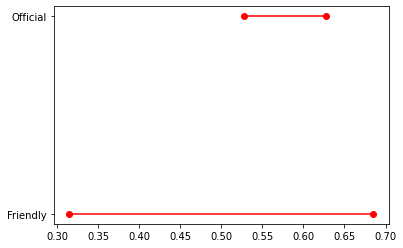

In [58]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Scotland are more likely to lose in official matches than friendly matches

In [59]:
x=np.array(x)
CI_scotlose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_scotlose_home

(0.5271938440225415, 0.6270614751263947)

In [60]:
CI_scotlose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_scotlose_away

(0.31480081136656335, 0.6851991886334367)

In [61]:
ci_iscotlose = {}
ci_scotlose['home'] = ['Yes','No']
ci_scotlose['lb'] = [CI_scotlose_home[0],CI_scotlose_away[0]]
ci_scotlose['ub'] = [CI_scotlose_home[1],CI_scotlose_away[1]]
df_ci= pd.DataFrame(ci_scotlose)
df_ci

,Typematch,lb,ub,home
0,Friendly,0.527194,0.627061,Yes
1,Official,0.314801,0.685199,No


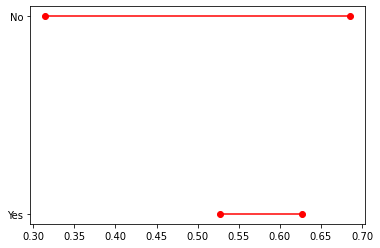

In [62]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Scotland are more likely to lose in home matches, meaning that the lack of crowd cheers does not affect them negatively

In [93]:
dfeng=df[df['country']=='England']
conditions = [
    (dfeng['tournament']=='Friendly'),
    (dfeng['tournament']!='Friendly')
    ]
values=['Friendly','Official']
dfeng['typematch'] = np.select(conditions, values)
dfeng['typematch'].value_counts()

<ipython-input-93-0b30e2c63d65>:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfeng['typematch'] = np.select(conditions, values)


In [95]:
x=pd.crosstab(dfeng['typematch'],dfeng['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,72,156,58,286
Official,84,259,88,431
All,156,415,146,717


In [96]:
x=np.array(x)
CI_engwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_friendly

(0.15619778812633506, 0.24939661746807051)

In [79]:
CI_engwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_official

(0.1661205581281346, 0.24223211008532247)

In [80]:
ci_engwin = {}
ci_engwin['Typematch'] = ['Friendly','Official']
ci_engwin['lb'] = [CI_engwin_friendly[0],CI_engwin_official[0]]
ci_engwin['ub'] = [CI_engwin_friendly[1],CI_engwin_official[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.156198,0.249397
1,Official,0.166121,0.242232


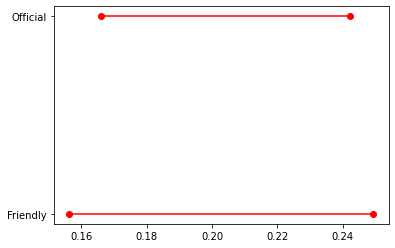

In [81]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Both intervals are similar which means that the location does not affect England's performance

In [82]:
dfeng['home']=(dfeng['home_team']=='England')

<ipython-input-82-ec6d22fd1ab4>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfeng['home']=(dfeng['home_team']=='England')


In [83]:
dfeng['home'].value_counts()

In [84]:
x=pd.crosstab(dfeng['home'],dfeng['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,55,115,83,253
True,101,300,63,464
All,156,415,146,717


In [85]:
x=np.array(x)
CI_engwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_engwin_home

(0.10460752863595074, 0.1669441955019803)

In [71]:
CI_engwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_engwin_away

(0.27020958414722984, 0.3859168980662089)

In [72]:
ci_engwin = {}
ci_engwin['home'] = ['Yes','No']
ci_engwin['lb'] = [CI_engwin_home[0],CI_engwin_away[0]]
ci_engwin['ub'] = [CI_engwin_home[1],CI_engwin_away[1]]
df_ci= pd.DataFrame(ci_engwin)
df_ci

,home,lb,ub
0,Yes,0.104608,0.166944
1,No,0.270210,0.385917


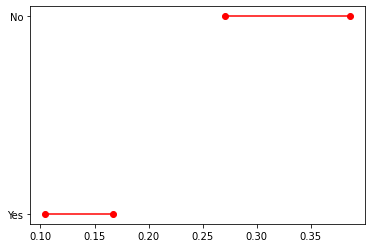

In [73]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

England is more likely to win in far away countries, which means crowd cheers do not affect them negatively

In [86]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_englose_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_englose_friendly

(0.27020958414722984, 0.3859168980662089)

In [87]:
CI_englose_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_englose_official

(0.10460752863595074, 0.1669441955019803)

In [97]:
ci_englose = {}
ci_englose['Typematch'] = ['Friendly','Official']
ci_englose['lb'] = [CI_englose_friendly[0],CI_englose_official[0]]
ci_englose['ub'] = [CI_englose_friendly[1],CI_englose_official[1]]
df_ci= pd.DataFrame(ci_englose)
df_ci

,Typematch,lb,ub
0,Friendly,0.270210,0.385917
1,Official,0.104608,0.166944


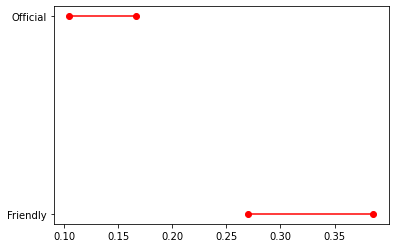

In [98]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

England are more likely to lose in friendly matches than official matches


In [99]:
x=np.array(x)
CI_englose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_englose_home

(0.5546956899682828, 0.6471604585235965)

In [105]:
CI_englose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_englose_away

(0.48774694494485304, 0.6031621459642378)

In [107]:
ci_englose = {}
ci_englose['home'] = ['Yes','No']
ci_englose['lb'] = [CI_englose_home[0],CI_englose_away[0]]
ci_englose['ub'] = [CI_englose_home[1],CI_englose_away[1]]
df_ci= pd.DataFrame(ci_englose)
df_ci

,home,lb,ub
0,Yes,0.554696,0.647160
1,No,0.487747,0.603162


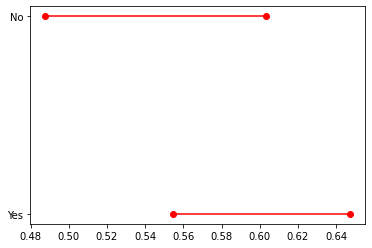

In [108]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

England are more likely to lose in home matches, meaning that the lack of crowd cheers does not affect them negatively 

In [116]:
dfusa=df[df['country']=='United States']
conditions = [
    (dfusa['tournament']=='Friendly'),
    (dfusa['tournament']!='Friendly')
    ]
values=['Friendly','Official']
dfusa['typematch'] = np.select(conditions, values)
dfusa['typematch'].value_counts()

<ipython-input-116-e5dabae374db>:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfusa['typematch'] = np.select(conditions, values)


In [117]:
x=pd.crosstab(dfusa['typematch'],dfusa['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [118]:
x=np.array(x)
x
   

In [119]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_usawin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_usawin_friendly

(0.3096072474351973, 0.38258264536725295)

In [136]:
CI_usawin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_usawin_official

(0.22959939266607973, 0.30122252514213943)

In [137]:
ci_usawin = {}
ci_usawin['Typematch'] = ['Friendly','Official']
ci_usawin['lb'] = [CI_usawin_friendly[0],CI_usawin_official[0]]
ci_usawin['ub'] = [CI_usawin_friendly[1],CI_usawin_official[1]]
df_ci= pd.DataFrame(ci_usawin)
df_ci

,Typematch,lb,ub
0,Friendly,0.309607,0.382583
1,Official,0.229599,0.301223


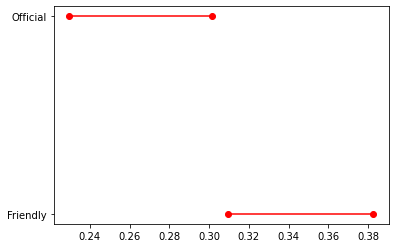

In [138]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

The United States are more likely to win friendly matches than in official matches

In [139]:

dfusa['home']=(dfusa['home_team']=='United States')
dfusa['home'].value_counts()
dfusa['home'].value_counts()

<ipython-input-139-5d86407ecc9e>:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfusa['home']=(dfusa['home_team']=='United States')


In [140]:
x=pd.crosstab(dfwal['home'],dfwal['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,0,14,6,20
True,84,123,112,319
All,84,137,118,339


In [141]:
x=np.array(x)
CI_usawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_usawin_home

(0.29871829353558793, 0.40347606383118323)

In [142]:
CI_usawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_usawin_away

(0.09916345547364067, 0.5008365445263593)

In [143]:
ci_usawin = {}
ci_usawin['home'] = ['Yes','No']
ci_usawin['lb'] = [CI_usawin_home[0],CI_usawin_away[0]]
ci_usawin['ub'] = [CI_usawin_home[1],CI_usawin_away[1]]
df_ci= pd.DataFrame(ci_usawin)
df_ci

,home,lb,ub
0,Yes,0.298718,0.403476
1,No,0.099163,0.500837


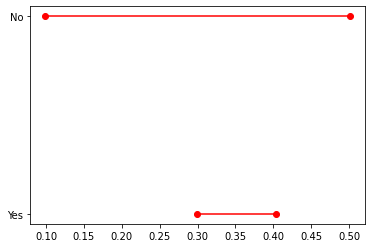

In [144]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The United States are more likely to lose in home matches, meaning that the lack of crowd cheers does not affect them negatively

In [120]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
CI_usalose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_usalose_friendly


(0.3410587617395715, 0.4154496609250533)

In [121]:
CI_usalose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_usalose_official

(0.4989576113893054, 0.5798095118983658)

In [122]:
ci_usalose = {}
ci_usalose['Typematch'] = ['Friendly','Official']
ci_usalose['lb'] = [CI_usalose_friendly[0],CI_usalose_official[0]]
ci_usalose['ub'] = [CI_usalose_friendly[1],CI_usalose_official[1]]
df_ci= pd.DataFrame(ci_usalose)
df_ci

,Typematch,lb,ub
0,Friendly,0.341059,0.41545
1,Official,0.498958,0.57981


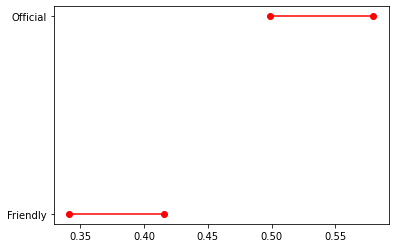

In [123]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

United States are more likely to lose in official matches than friendly matches


In [124]:
x=np.array(x)
CI_usalose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_usalose_home

(0.4989576113893054, 0.5798095118983658)

In [125]:
CI_usalose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_usalose_away

(0.3410587617395715, 0.4154496609250533)

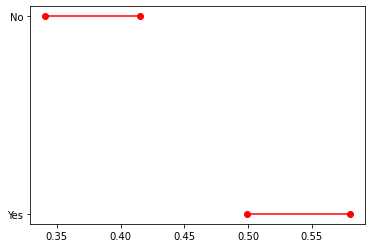

In [126]:
ci_usalose = {}
ci_usalose['home'] = ['Yes','No']
ci_usalose['lb'] = [CI_usalose_home[0],CI_usalose_away[0]]
ci_usalose['ub'] = [CI_usalose_home[1],CI_usalose_away[1]]
df_ci= pd.DataFrame(ci_usalose)
df_ci
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

The United States is more likely to lose in home matches, meaning that the lack of crowd cheers does not affect them negatively 

Conclusion: In most cases, crowd cheers did affect how the teams performed, but the relation between both variables was not the strongest so the analysis of other variables is needed as well.

Assignment Part II

In [9]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [10]:
cvd=pd.read_csv('covid_data.csv',encoding='latin-1')
cvd.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [11]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
cvd['month'] = cvd['month'].astype(cat_type)

In [12]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error


def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error










Number of total cases

In [14]:
import numpy as np
cases=cvd.groupby("weekdays").agg({"dcases":[np.mean, np.std, np.size, get_ci_ub, get_ci_ub]})
cases

dcases 
 
 
 
 mean 
 std 
 size 
 get_ci_ub 
 get_ci_ub 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 Fri 
 2643.215039 
 13626.207863 
 17634 
 2844.345336 
 2844.345336 
 
 
 Mon 
 2116.600879 
 11700.105447 
 17521 
 2289.856936 
 2289.856936 
 
 
 Sat 
 2174.297447 
 10922.667935 
 17472 
 2336.267827 
 2336.267827 
 
 
 Sun 
 1852.340706 
 9559.968071 
 17496 
 1994.006564 
 1994.006564 
 
 
 Thu 
 2693.674338 
 14618.890740 
 17598 
 2909.677808 
 2909.677808 
 
 
 Tue 
 2388.510716 
 11756.420050 
 17544 
 2562.486516 
 2562.486516 
 
 
 Wed 
 2601.990272 
 12848.605924 
 17578 
 2791.944637 
 2791.944637

Number of total confirmed deaths

In [15]:
import numpy as np
deaths=cvd.groupby("weekdays").agg({"ddeaths":[np.mean, np.std, np.size, get_ci_ub, get_ci_ub]})
deaths

ddeaths 
 
 
 
 mean 
 std 
 size 
 get_ci_ub 
 get_ci_ub 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 Fri 
 47.990756 
 208.404740 
 17634 
 51.066925 
 51.066925 
 
 
 Mon 
 37.954968 
 155.752300 
 17521 
 40.261360 
 40.261360 
 
 
 Sat 
 40.258413 
 177.949619 
 17472 
 42.897198 
 42.897198 
 
 
 Sun 
 31.856367 
 139.320870 
 17496 
 33.920915 
 33.920915 
 
 
 Thu 
 49.695534 
 224.874945 
 17598 
 53.018205 
 53.018205 
 
 
 Tue 
 50.840002 
 230.863861 
 17544 
 54.256410 
 54.256410 
 
 
 Wed 
 51.346968 
 226.105877 
 17578 
 54.689727 
 54.689727

Fatality rate of covid cases by comparing the cases to the deaths

In [17]:
fatrate=cvd['totcases']=cvd.groupby(['iso3c'])['dcases'].cumsum()
fatrate

In [40]:
cvd['date'][0]

cvd['date'] = pd. to_datetime(cvd['date'],format='%Y-%m-%d')

cvd['date'][0]

cvd['year'] = pd. DatetimeIndex(cvd['date']). year

cvd['year'][0]

2020

Comparison of the cases in 2020 and 2021 in terms of:

In [41]:
ratio=cvd['dcases']/cvd['ddeaths']

cvd['ratio']=ratio

cvd = cvd.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

cvd

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,ratio
28,2020-03-23,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Mon,Mar,2020,6.000000
31,2020-03-26,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Thu,Mar,2020,6.000000
34,2020-03-29,AFG,Afghanistan,Low income,South Asia,Asia,8,2,38041754,Sun,Mar,2020,4.000000
39,2020-04-03,AFG,Afghanistan,Low income,South Asia,Asia,34,1,38041754,Fri,Apr,2020,34.000000
41,2020-04-05,AFG,Afghanistan,Low income,South Asia,Asia,29,2,38041754,Sun,Apr,2020,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122837,2021-12-26,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,605,6,14645468,Sun,Dec,2021,100.833333
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021,64.588235
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021,65.593750
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021,73.333333


Continent

In [50]:
conty=cvd.groupby(['continent','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

conty=conty.reset_index()

conty= pd.DataFrame(conty)



In [11]:

conty20=conty[(conty['year']==2020)]
conty21=conty[(conty['year']==2021)]


In [12]:
conty20.columns
conty20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
conty21.columns
conty21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

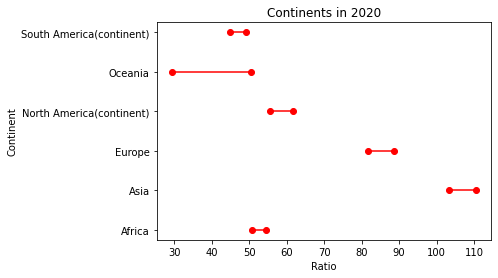

In [14]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(conty20['get_ci_lb'],conty20['get_ci_ub'],range(len(conty))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(conty20)),list(conty20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents in 2020")

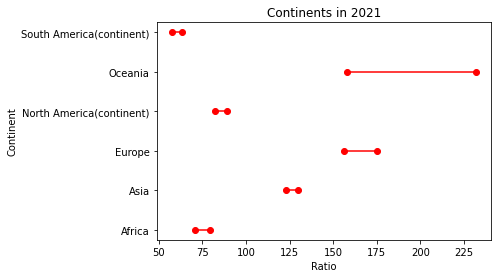

In [15]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(conty21['get_ci_lb'],conty21['get_ci_ub'],range(len(conty))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(conty21)),list(conty21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents in 2021")

Region

In [ ]:
regy=cvd.groupby(['region','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

regy=regy.reset_index()

regy= pd.DataFrame(regy)

In [16]:
regy20=regy[(regy['year']==2020)]
regy21=regy[(regy['year']==2021)]

In [44]:

regy20.columns
regy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
regy21.columns
regy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

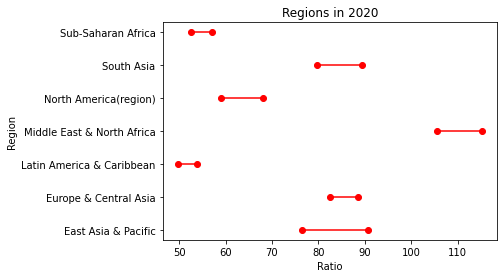

In [18]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(regy20['get_ci_lb'],regy20['get_ci_ub'],range(len(regy20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(regy20)),list(regy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions in 2020")

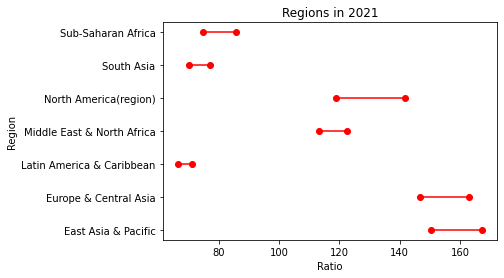

In [21]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(regy21['get_ci_lb'],regy21['get_ci_ub'],range(len(regy21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(regy21)),list(regy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions in 2021")

In [ ]:
Income

In [ ]:


incy=cvd.groupby(['income','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

incy=incy.reset_index()

incy= pd.DataFrame(incy)

In [23]:
incy20=incy[(incy['year']==2020)]
incy21=incy[(incy['year']==2021)]

In [45]:
incy20.columns
incy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
incy21.columns
incy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

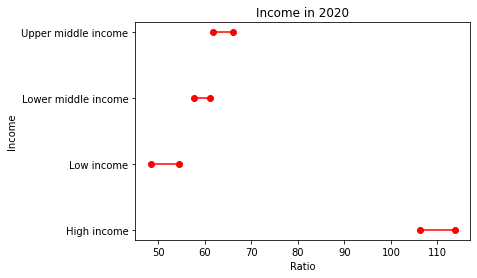

In [24]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(incy20['get_ci_lb'],incy20['get_ci_ub'],range(len(incy20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(incy20)),list(incy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income in 2020")

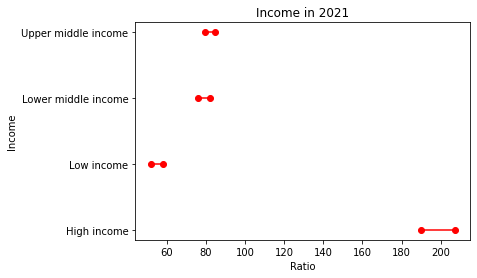

In [25]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(incy21['get_ci_lb'],incy21['get_ci_ub'],range(len(incy21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(incy21)),list(incy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income in 2021")

In [51]:
couny20=popy[(couny['year']==2020)]
couny21=popy[(couny['year']==2021)]

In [52]:
couny20.columns
couny20.columns=['country','year','mean','std','size','get_ci_lb','get_ci_ub']
couny21.columns
couny21.columns=['country','year','mean','std','size','get_ci_lb','get_ci_ub']

Conclusion: I used this dataset to show the fatality rate of Covid in both years, and the difference of death in both 2020 and 2021 in reference to income, regions, and continents.

In [1]:
import nbconvert